Data_cleaning_2

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.index = mtcars.model

del mtcars['model']



In [4]:
colmeans = mtcars.sum()/mtcars.shape[0]  # Get column means

colmeans

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [6]:
centered = mtcars - colmeans
centered.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,32.000000,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.0000
mean,-3.108624e-15,0.000000,2.131628e-14,0.000000,-1.526557e-16,-4.440892e-16,-2.609024e-15,0.000000,0.000000,0.000000,0.0000
std,6.026948e+00,1.785922,1.239387e+02,68.562868,5.346787e-01,9.784574e-01,1.786943e+00,0.504016,0.498991,0.737804,1.6152
min,-9.690625e+00,-2.187500,-1.596219e+02,-94.687500,-8.365625e-01,-1.704250e+00,-3.348750e+00,-0.437500,-0.406250,-0.687500,-1.8125
25%,-4.665625e+00,-2.187500,-1.098969e+02,-50.187500,-5.165625e-01,-6.360000e-01,-9.562500e-01,-0.437500,-0.406250,-0.687500,-0.8125
50%,-8.906250e-01,-0.187500,-3.442187e+01,-23.687500,9.843750e-02,1.077500e-01,-1.387500e-01,-0.437500,-0.406250,0.312500,-0.8125
75%,2.709375e+00,1.812500,9.527813e+01,33.312500,3.234375e-01,3.927500e-01,1.051250e+00,0.562500,0.593750,0.312500,1.1875
max,1.380937e+01,1.812500,2.412781e+02,188.312500,1.333437e+00,2.206750e+00,5.051250e+00,0.562500,0.593750,1.312500,5.1875


In [9]:
from sklearn import preprocessing

In [10]:
scaled_data = preprocessing.scale(mtcars)

scaled_data = pd.DataFrame(scaled_data, index = mtcars.index,columns=mtcars.columns)

scaled_data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17,1.665335e-16,0.000000,-3.053113e-16,-4.718448e-16,-1.471046e-15,0.000000,0.000000,-2.775558e-17,-2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001,1.016001e+00,1.016001e+00
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130,-1.589643e+00,-1.769642e+00,-1.903996e+00,-0.881917,-0.827170,-9.467293e-01,-1.140108e+00
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-0.743705,-9.815764e-01,-6.604034e-01,-5.436944e-01,-0.881917,-0.827170,-9.467293e-01,-5.110827e-01
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-0.351014,1.870518e-01,1.118844e-01,-7.888899e-02,-0.881917,-0.827170,4.303315e-01,-5.110827e-01
75%,4.567366e-01,1.031121e+00,7.810529e-01,0.493642,6.145986e-01,4.078199e-01,5.977084e-01,1.133893,1.208941,4.303315e-01,7.469671e-01
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515,2.533809e+00,2.291423e+00,2.871986e+00,1.133893,1.208941,1.807392e+00,3.263067e+00


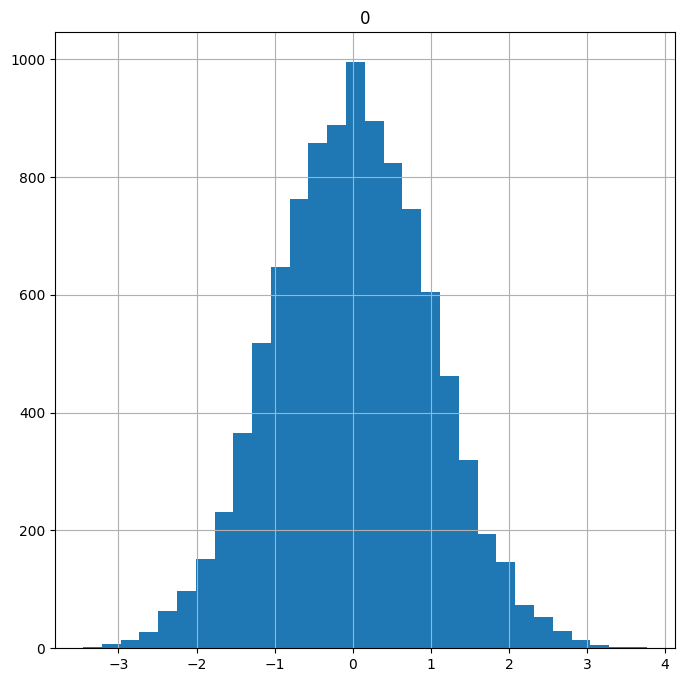

In [18]:
normally_distributed = np.random.normal(size=10000)  

normally_distributed = pd.DataFrame(normally_distributed)
normally_distributed.hist(figsize=(8,8), bins=30);    

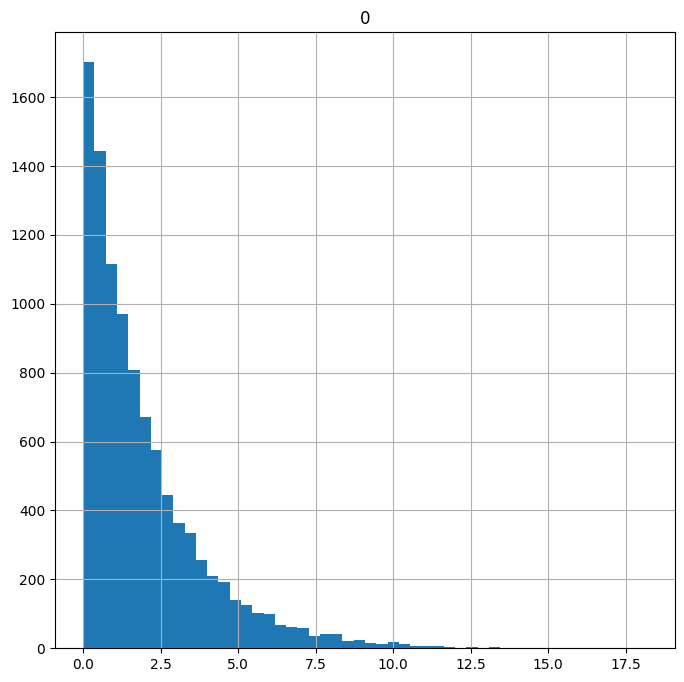

In [21]:
skewed = np.random.exponential(scale=2,size= 10000)  

skewed = pd.DataFrame(skewed)                # Convert to DF

skewed.hist(figsize=(8,8),                   # Plot histogram
            bins=50);  

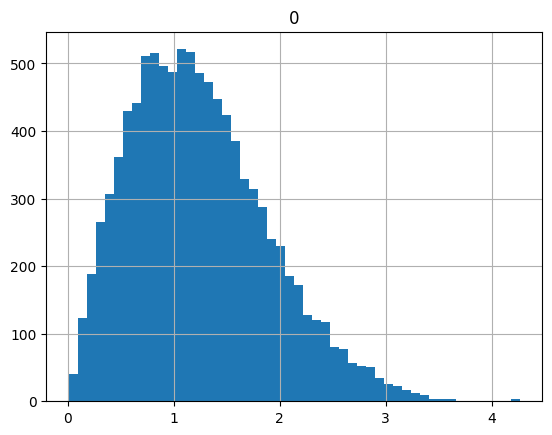

In [22]:
sqrt_transformed = skewed.apply(np.sqrt)

sqrt_transformed.hist(bins = 50);

array([[<Axes: title={'center': '0'}>]], dtype=object)

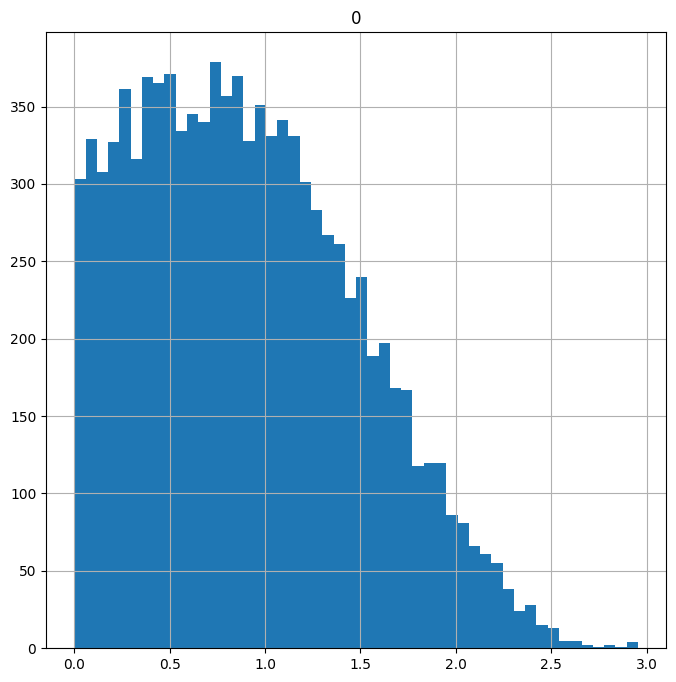

In [23]:
log_transformed = (skewed+1).apply(np.log)

log_transformed.hist(figsize=(8,8),bins=50)

In [24]:
mtcars.iloc[:,0:6].corr() 

,mpg,cyl,disp,hp,drat,wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000


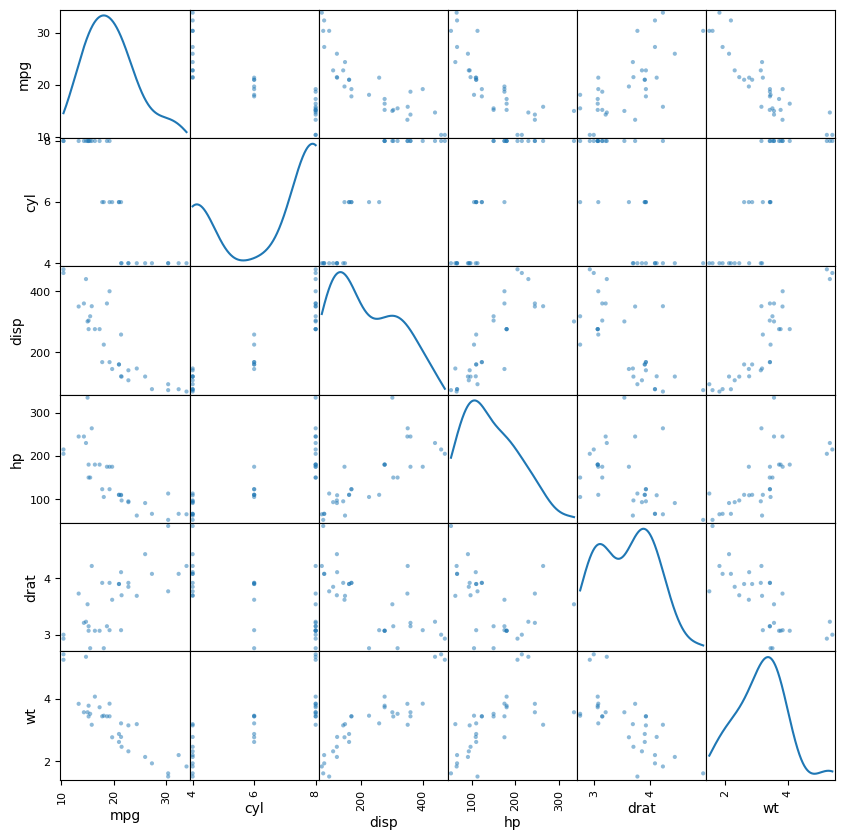

In [26]:
from pandas.plotting import scatter_matrix


scatter_matrix(mtcars.iloc[:,0:6], # Make a scatter matrix of 6 columns
               figsize=(10, 10),   # Set plot size
               diagonal='kde');

In [30]:
from sklearn.impute import SimpleImputer


# The following line sets a few mpg values to None
mtcars["mpg"] = np.where(mtcars["mpg"]>22, None, mtcars["mpg"])

mtcars["mpg"]

model
Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             None
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              None
Merc 230               None
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               None
Honda Civic            None
Toyota Corolla         None
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              None
Porsche 914-2          None
Lotus Europa           None
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: object

In [33]:
imp = SimpleImputer(missing_values=np.NAN, strategy='mean')              # Impute by column

imputed_cars = imp.fit_transform(mtcars)   # Use imputation model to get values

imputed_cars = pd.DataFrame(imputed_cars,  # Remake DataFrame with new values
                           index=mtcars.index,
                           columns = mtcars.columns)

imputed_cars.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.000000,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.000000,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,17.065217,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.400000,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.700000,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.100000,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.300000,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,17.065217,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,17.065217,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
